date                      0
rented_bike_count         0
hour                      0
temperature               0
humidity                  0
wind_speed                0
visibility                0
dew_point_temperature    86
solar_radiation           0
rainfall                  0
snowfall                  0
seasons                   0
holiday                   0
work_hours                0
dtype: int64
       rented_bike_count         hour  temperature     humidity   wind_speed  \
count        8760.000000  8760.000000  8760.000000  8760.000000  8760.000000   
mean          704.602055    11.500000    12.882922    58.226256     1.724909   
std           644.997468     6.922582    11.944825    20.362413     1.036300   
min             0.000000     0.000000   -17.800000     0.000000     0.000000   
25%           191.000000     5.750000     3.500000    42.000000     0.900000   
50%           504.500000    11.500000    13.700000    57.000000     1.500000   
75%          1065.250000    17.2500

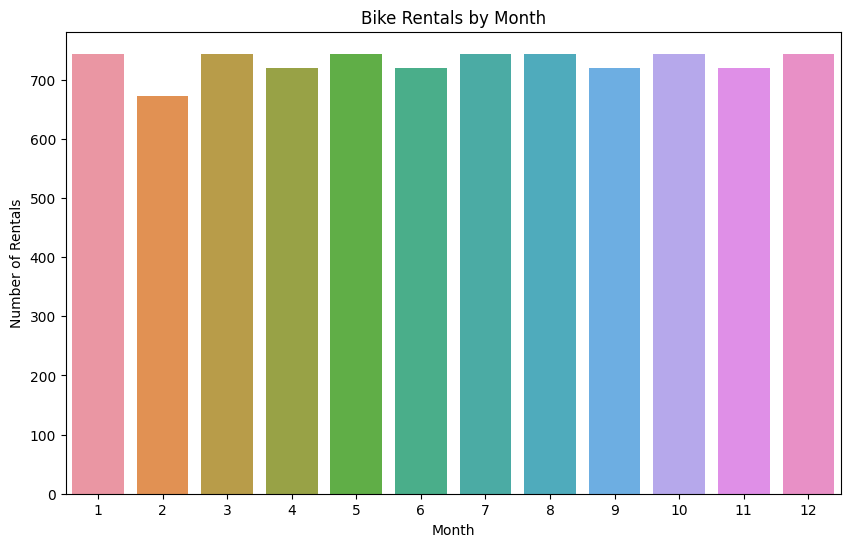

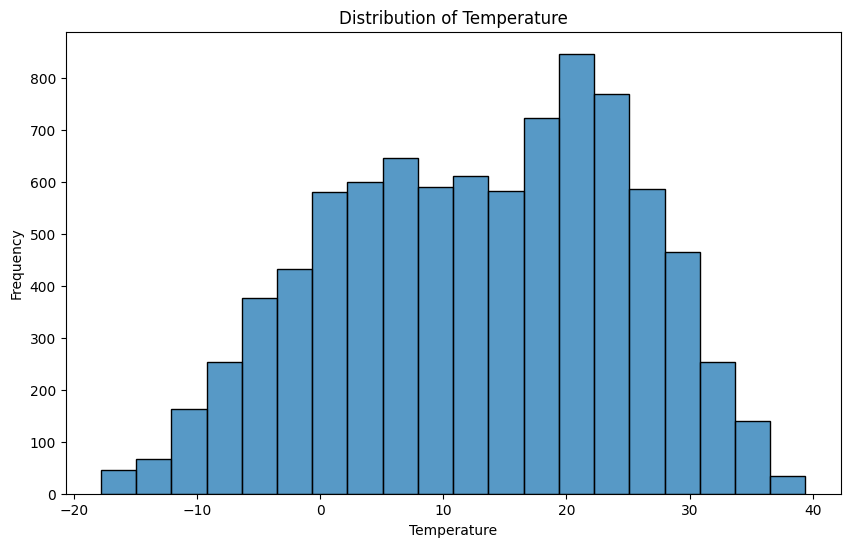

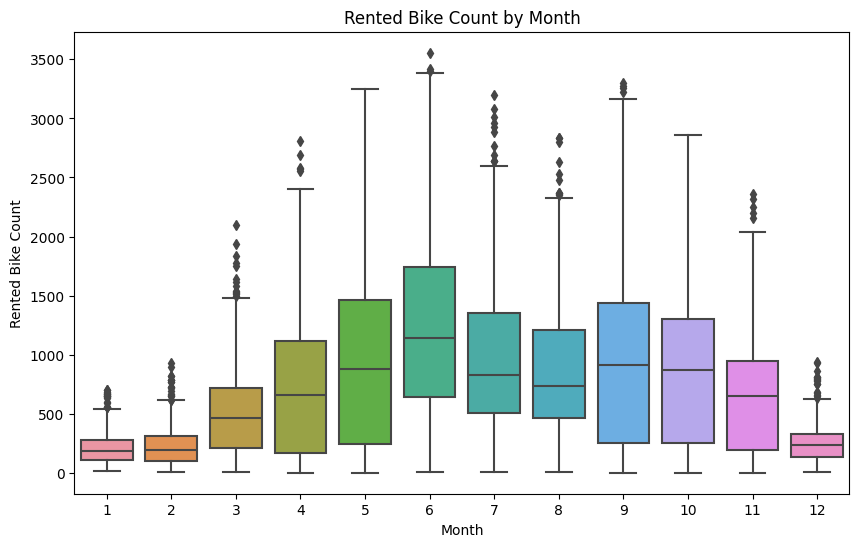

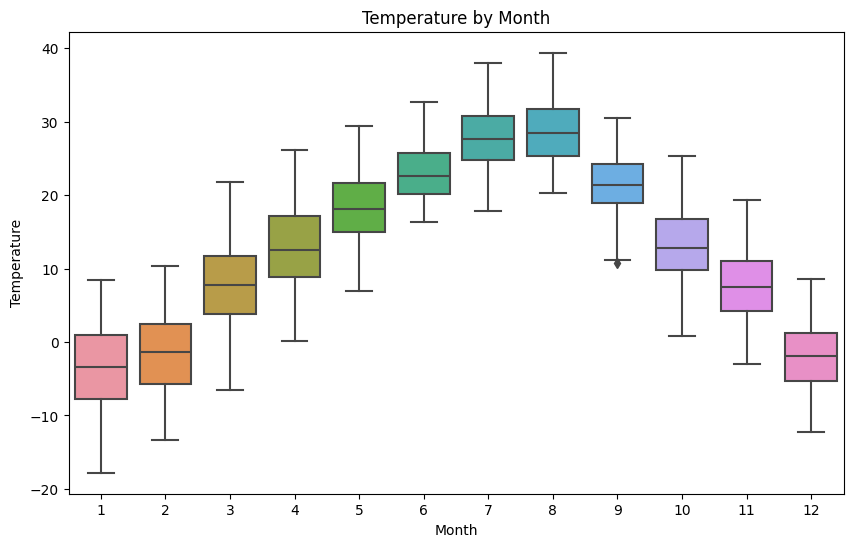

Linear Regression Results:
Mean Absolute Error: 330.199401566806
Mean Squared Error: 193318.59897518498
R2 Score: 0.5538876263620081

Ridge Regression Results:
Mean Absolute Error: 330.1140665525415
Mean Squared Error: 193312.5620120243
R2 Score: 0.5539015575821775


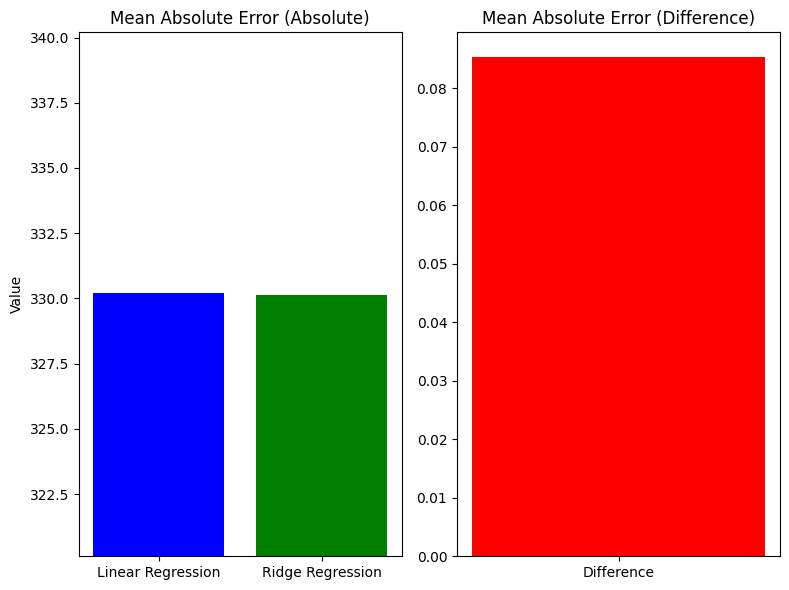

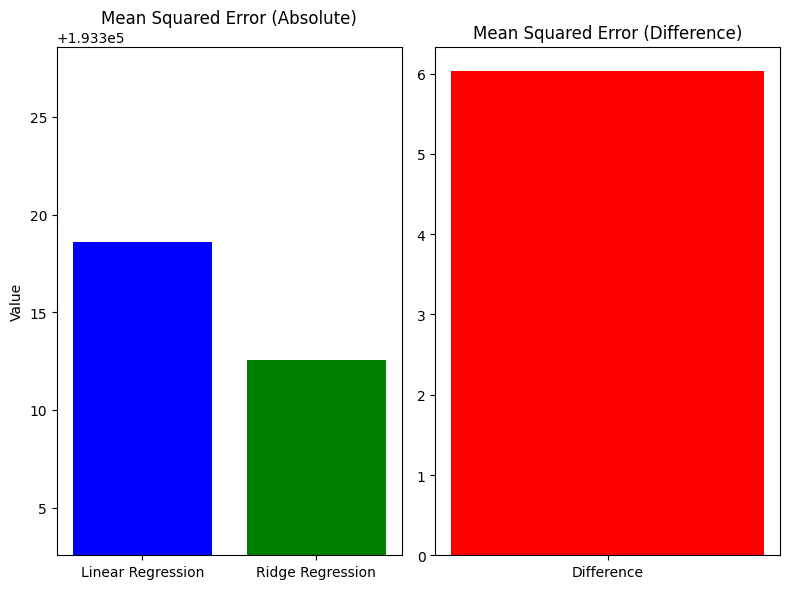

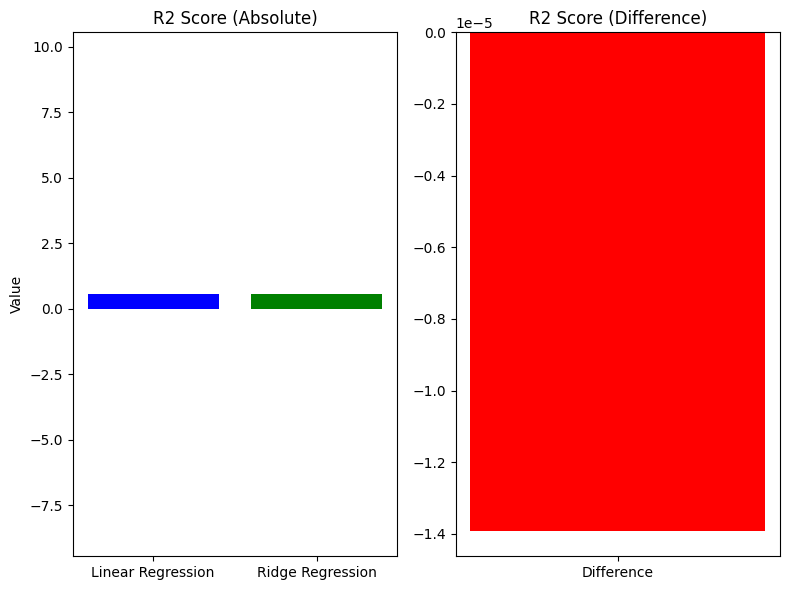

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Nalaganje podatkov
data = pd.read_csv('C:/Users/mitja/Desktop/bike_data.csv')

# Izpis števila vrstic z manjkajočimi podatki
print(data.isnull().sum())

# Zapolnitev manjkajočih podatkov
for column in data.columns:
    if data[column].dtype in [np.float64, np.int64]:
        data[column].fillna(data[column].mean(), inplace=True)

# Pretvorba stolpca "date"
data['day'] = data['date'].str.split('/').str[0].astype(int)
data['month'] = data['date'].str.split('/').str[1].astype(int)
data['year'] = data['date'].str.split('/').str[2].astype(int)
data.drop('date', axis=1, inplace=True)

# Kodiranje kategoričnih spremenljivk
data = pd.get_dummies(data, columns=['seasons', 'holiday', 'work_hours'])

# Opisna statistika
print(data.describe())

# Histogram za izposojo koles
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month')  
plt.title('Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.show()

# Histogram za temperaturo
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='temperature', bins=20) 
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Graf raztrosa za število izposojenih koles glede na mesec
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='rented_bike_count', data=data)  
plt.title('Rented Bike Count by Month')
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.show()

# Graf raztrosa za temperaturo glede na mesec
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='temperature', data=data)
plt.title('Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

# Priprava podatkov za model
X = data.drop('rented_bike_count', axis=1)
y = data['rented_bike_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

# Linearna regresija
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

print("Linear Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

# Ridge regresija
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)

print("\nRidge Regression Results:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

# Primerjava rezultatov

linear_metrics = [
    mean_absolute_error(y_test, y_pred),
    mean_squared_error(y_test, y_pred),
    r2_score(y_test, y_pred)
]

ridge_metrics = [
    mean_absolute_error(y_test, y_pred_ridge),
    mean_squared_error(y_test, y_pred_ridge),
    r2_score(y_test, y_pred_ridge)
]

labels = ['Linear Regression', 'Ridge Regression']
metrics_names = ['Mean Absolute Error', 'Mean Squared Error', 'R2 Score']

difference_metrics = [
    linear_metrics[i] - ridge_metrics[i] for i in range(3)
]

# Prikaz vsake metrike v ločenem grafu z omejenim y-osjo in prikazom razlik
for i, metric_name in enumerate(metrics_names):
    plt.figure(figsize=(8, 6))
    
    # Prikaz absolutnih vrednosti z omejitvijo y-osi
    plt.subplot(1, 2, 1)
    plt.bar(labels, [linear_metrics[i], ridge_metrics[i]], color=['blue', 'green'])
    plt.title(metric_name + " (Absolute)")
    plt.ylabel('Value')
    # Omejitev y-osi
    min_val = min(linear_metrics[i], ridge_metrics[i]) - 10
    max_val = max(linear_metrics[i], ridge_metrics[i]) + 10
    plt.ylim(min_val, max_val)
    
    # Prikaz razlik
    plt.subplot(1, 2, 2)
    plt.bar('Difference', difference_metrics[i], color='red')
    plt.title(metric_name + " (Difference)")
    plt.tight_layout()
    
    plt.show()
